# Data Cleaning

In [ ]:
import pandas as pd
df_data_1 = pd.read_csv("mainSimulationAccessTraces.csv")

### Missing Values

In [ ]:
import numpy as np
df_data_1['accessedNodeType'] = df_data_1['accessedNodeType'].fillna(value='/Malicious')

### Unexpected Values

In [ ]:
df_data_1.loc[df_data_1.value=='twenty',"value"] = '20.0'
df_data_1.loc[df_data_1.value=='false',"value"] = '0'
df_data_1.loc[df_data_1.value=='true',"value"] = '1'
df_data_1.loc[df_data_1.value=='none',"value"] = '0'
df_data_1.loc[df_data_1.value=='0',"value"] = '0.0'
df_data_1['value'] = df_data_1['value'].fillna(value='60.0')
df_data_1 = df_data_1.drop(df_data_1.index[df_data_1.value.str.contains("org.*")])
df_data_1.value = df_data_1.value.astype(float)
df_data_1.dropna()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,0.0000,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,0.0000,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,0.0000,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,0.0000,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,0.0000,1520031603464,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357947,lightcontrol23,/agent23/lightcontrol23,/lightControler,room_4,/agent23/tempin23,/sensorService,room_4,/agent23/tempin23,/sensorService,read,20.3479,1520117997001,normal
357948,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charge,/basic/number,read,9.0000,1520117997339,normal
357949,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,read,1.0000,1520117997401,normal
357950,lightcontrol28,/agent28/lightcontrol28,/lightControler,room_9,/agent28/movement28,/movementSensor,room_9,/agent28/movement28/movement,/derived/boolean,read,0.0000,1520117998907,normal


### Cleaned Data

In [ ]:
df_data_1.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,0.0,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,0.0,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,0.0,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,0.0,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,0.0,1520031603464,normal


# Frequency Distribution Visualization

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

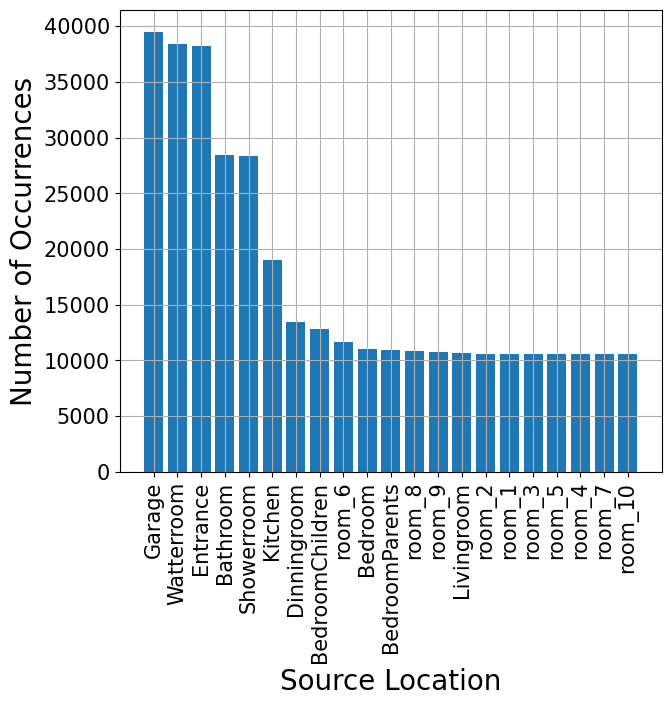

In [ ]:
source_loc_count = df_data_1.sourceLocation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.bar(source_loc_count.index, source_loc_count.values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Source Location', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
for i,j in zip(source_loc_count.index,source_loc_count.values):
    print(i,j)

Garage 39499
Watterroom 38368
Entrance 38217
Bathroom 28461
Showerroom 28315
Kitchen 18962
Dinningroom 13429
BedroomChildren 12836
room_6 11642
Bedroom 11009
BedroomParents 10946
room_8 10798
room_9 10752
Livingroom 10620
room_2 10606
room_1 10601
room_3 10597
room_5 10596
room_4 10572
room_7 10558
room_10 10557


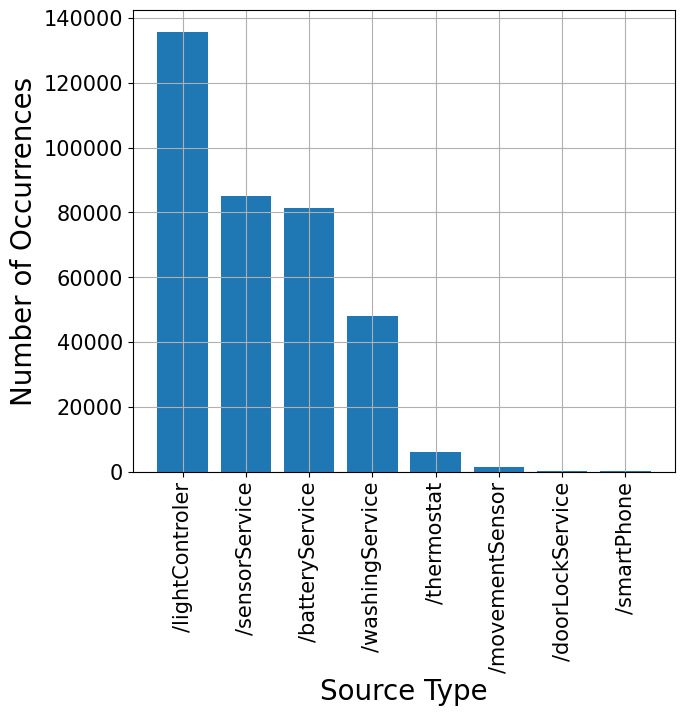

In [ ]:
source_type_count = df_data_1.sourceType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(source_type_count.index, source_type_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Source Type', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
for i,j in zip(source_type_count.index,source_type_count.values):
    print(i,j)

/lightControler 135775
/sensorService 85196
/batteryService 81267
/washingService 47986
/thermostat 5980
/movementSensor 1301
/doorLockService 330
/smartPhone 106


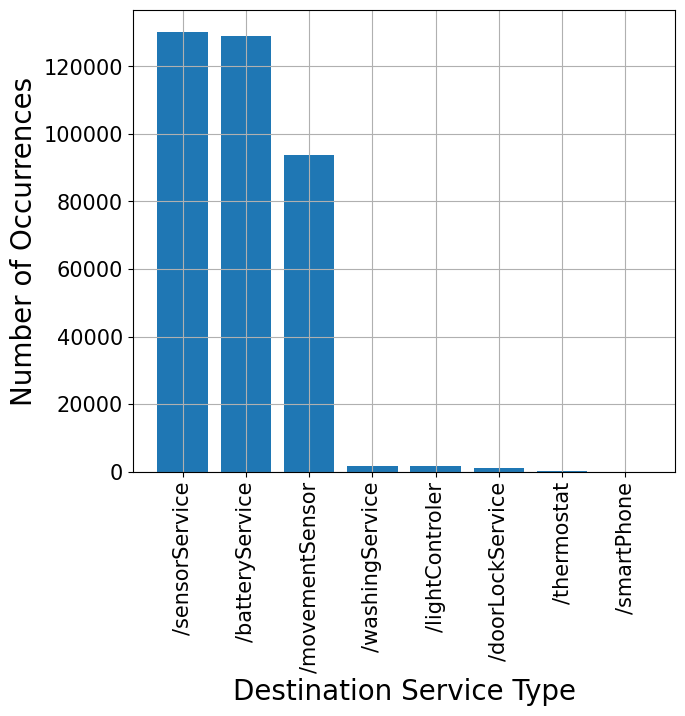

In [ ]:
destination_type_count = df_data_1.destinationServiceType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(destination_type_count.index, destination_type_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Service Type', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
for i,j in zip(destination_type_count.index,destination_type_count.values):
    print(i,j)

/sensorService 130313
/batteryService 129119
/movementSensor 93645
/washingService 1805
/lightControler 1694
/doorLockService 1043
/thermostat 319
/smartPhone 3


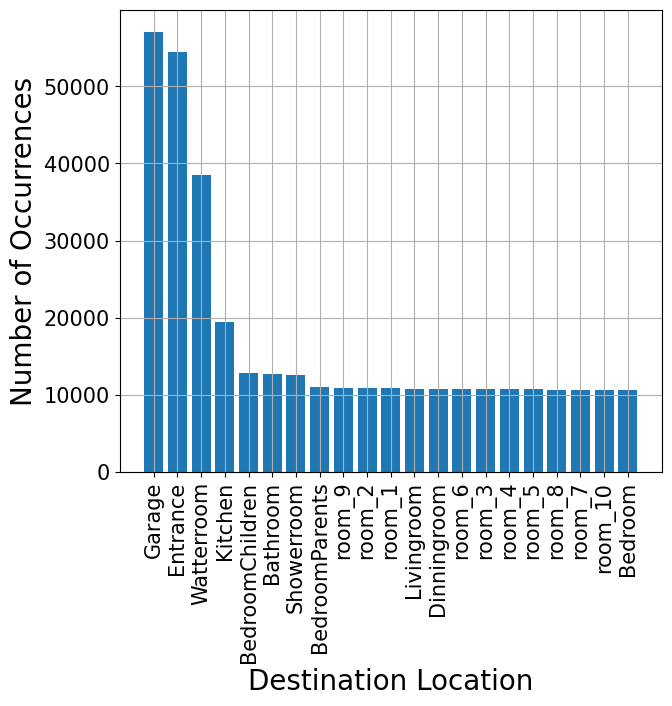

In [ ]:
destination_location_count = df_data_1.destinationLocation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(destination_location_count.index, destination_location_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Location', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
for i,j in zip(destination_location_count.index,destination_location_count.values):
    print(i,j)

Garage 57100
Entrance 54448
Watterroom 38524
Kitchen 19437
BedroomChildren 12768
Bathroom 12684
Showerroom 12583
BedroomParents 10938
room_9 10843
room_2 10828
room_1 10805
Livingroom 10781
Dinningroom 10759
room_6 10741
room_3 10732
room_4 10708
room_5 10687
room_8 10651
room_7 10649
room_10 10648
Bedroom 10627


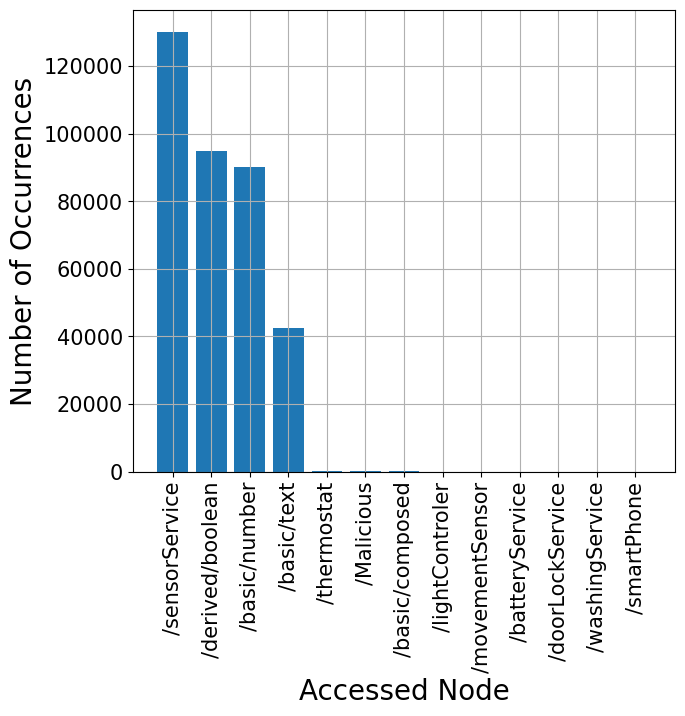

In [ ]:
accessed_node_count = df_data_1.accessedNodeType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(accessed_node_count.index, accessed_node_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Accessed Node', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
for i,j in zip(accessed_node_count.index,accessed_node_count.values):
    print(i,j)

/sensorService 130155
/derived/boolean 94725
/basic/number 90010
/basic/text 42428
/thermostat 313
/Malicious 148
/basic/composed 100
/lightControler 23
/movementSensor 22
/batteryService 6
/doorLockService 5
/washingService 3
/smartPhone 3


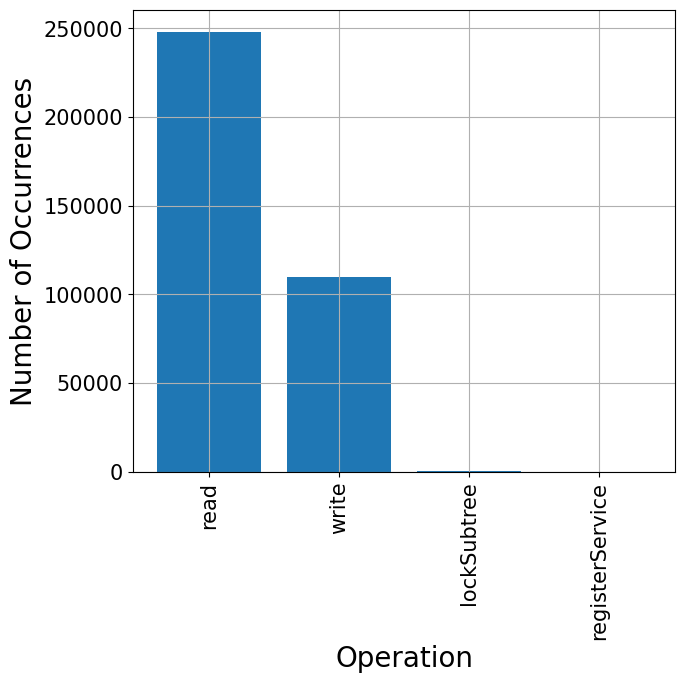

In [ ]:
operation_count = df_data_1.operation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(operation_count.index, operation_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Operation', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
for i,j in zip(operation_count.index,operation_count.values):
    print(i,j)

read 248061
write 109648
lockSubtree 148
registerService 84


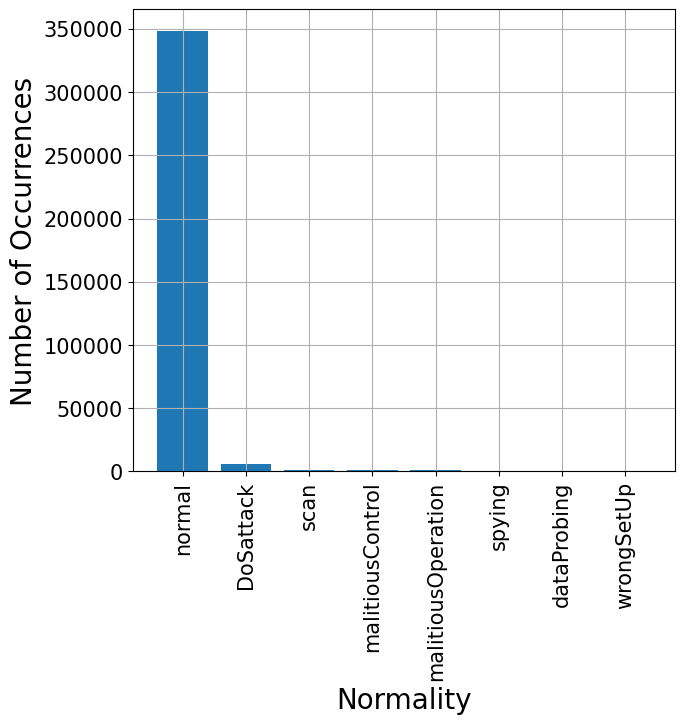

In [ ]:
normality_count = df_data_1.normality.value_counts()
indices = ['normal', 'DoSattack', 'scan', 'malitiousControl', 'malitiousOperation', 'spying', 'dataProbing', 'wrongSetUp']
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(indices, normality_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Normality', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
for i,j in zip(normality_count.index,normality_count.values):
    print(i,j)

normal 347924
anomalous(DoSattack) 5780
anomalous(scan) 1547
anomalous(malitiousControl) 889
anomalous(malitiousOperation) 805
anomalous(spying) 532
anomalous(dataProbing) 342
anomalous(wrongSetUp) 122


#  Features Emgineering and Vectorization

In [ ]:
df_1 = df_data_1.drop('timestamp',axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder0 = LabelEncoder()
labelencoder1 = LabelEncoder()
labelencoder4 = LabelEncoder()
labelencoder7 = LabelEncoder()
labelencodery = LabelEncoder()

In [ ]:
X_0 = df_1.iloc[:,0].values
X_1 = df_1.iloc[:,1].values
X_4 = df_1.iloc[:,4].values
X_7 = df_1.iloc[:,7].values
y = df_1.iloc[:,11].values

In [ ]:
X_0 = labelencoder0.fit_transform(X_0)
X_0 = X_0.reshape(len(X_0),1)
X_1 = labelencoder1.fit_transform(X_1)
X_1 = X_1.reshape(len(X_1),1)
X_4 = labelencoder4.fit_transform(X_4)
X_4 = X_4.reshape(len(X_4),1)
X_7 = labelencoder7.fit_transform(X_7)
X_7 = X_7.reshape(len(X_7),1)
y = labelencodery.fit_transform(y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_2 = LabelEncoder()
le_3 = LabelEncoder()
le_5 = LabelEncoder()
le_6 = LabelEncoder()
le_8 = LabelEncoder()
le_9 = LabelEncoder()

In [ ]:
X_2 = df_1.iloc[:,2].values
X_3 = df_1.iloc[:,3].values
X_5 = df_1.iloc[:,5].values
X_6 = df_1.iloc[:,6].values
X_8 = df_1.iloc[:,8].values
X_9 = df_1.iloc[:,9].values
X_10 = df_1.iloc[:,10].values

In [ ]:
X_2 = le_2.fit_transform(X_2)
X_2 = X_2.reshape(len(X_2),1)
X_3 = le_3.fit_transform(X_3)
X_3 = X_3.reshape(len(X_3),1)
X_5 = le_5.fit_transform(X_5)
X_5 = X_5.reshape(len(X_5),1)
X_6 = le_6.fit_transform(X_6)
X_6 = X_6.reshape(len(X_6),1)
X_8 = le_8.fit_transform(X_8)
X_8 = X_8.reshape(len(X_8),1)
X_9 = le_9.fit_transform(X_9)
X_9 = X_9.reshape(len(X_9),1)
X_10 = X_10.reshape(len(X_10),1)

In [ ]:
X = np.concatenate((X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10),axis=1)
labelencodery.classes_

array(['anomalous(DoSattack)', 'anomalous(dataProbing)',
       'anomalous(malitiousControl)', 'anomalous(malitiousOperation)',
       'anomalous(scan)', 'anomalous(spying)', 'anomalous(wrongSetUp)',
       'normal'], dtype=object)

In [ ]:
labelencodery.transform(['anomalous(dataProbing)'])

array([1])

In [ ]:
y_resized = y.reshape(len(y),1)
df_spark = np.concatenate((y_resized,X),axis=1)
df_spark = pd.DataFrame(df_spark)
df_spark.to_csv('DF_Spark.csv')

# ML Implementation



In [ ]:
df_spark = pd.read_csv('DF_Spark.csv')
df_spark.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [ ]:
df_spark = df_spark.drop(columns="Unnamed: 0")
df_spark.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


### In the following code X contains features and y contains label

In [ ]:
y = df_spark.iloc[:,0].values
X = df_spark.iloc[:,1:].values

### The whole dataset is split into 80:20 ratio. X_train contains 80% of the features, X_test contains 20% of the features and y_train contains 80% corresponding label of X_train and y_test contains 20% corresponding label of X_test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

## 5-Fold Cross validation Estimation for Logistic Regression

In [ ]:
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
for i in train_sizes:
    print(i)

57270
114540
171811
229081
286352


In [ ]:
for i in train_mean:
    print(i)

0.9864187183516675
0.986911122751877
0.9868308781160694
0.9865846578284538
0.9883150807397888


In [ ]:
for i in test_mean:
    print(i)

0.8969772041405518
0.8779824156058529
0.9781109282961822
0.9846064215159688
0.9880902458937426


## 5-Fold Cross validation Estimation for SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', LinearSVC())])
train_sizes_svc, train_scores_svc, test_scores_svc = learning_curve(estimator=pipe_svc,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_svc = np.mean(train_scores_svc, axis=1)
train_std_svc = np.std(train_scores_svc, axis=1)
test_mean_svc = np.mean(test_scores_svc, axis=1)
test_std_svc = np.std(test_scores_svc, axis=1)

In [ ]:
for i in train_mean_svc:
    print(i)

In [ ]:
for i in test_mean_svc:
    print(i)

## 5-Fold Cross validation Estimation for Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
pipe_tree = Pipeline([('scl', StandardScaler()),('clf', tree.DecisionTreeClassifier())])
train_sizes_tree, train_scores_tree, test_scores_tree = learning_curve(estimator=pipe_tree,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_tree = np.mean(train_scores_tree, axis=1)
train_std_tree = np.std(train_scores_tree, axis=1)
test_mean_tree = np.mean(test_scores_tree, axis=1)
test_std_tree = np.std(test_scores_tree, axis=1)

In [ ]:
for i in train_mean_tree:
    print(i)

0.9866876200453991
0.9884634188929631
0.9906874414327372
0.9928566751498378
0.9942169078616528


In [ ]:
for i in test_mean_tree:
    print(i)

0.9694195125561589
0.8911130998614905
0.9801671313804766
0.9884087269868391
0.9934738195880968


## 5-Fold Cross validation Estimation for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipe_rnd = Pipeline([('scl', StandardScaler()),('clf', RandomForestClassifier(n_estimators=10))])
train_sizes_rnd, train_scores_rnd, test_scores_rnd = learning_curve(estimator=pipe_rnd,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_rnd = np.mean(train_scores_rnd, axis=1)
train_std_rnd = np.std(train_scores_rnd, axis=1)
test_mean_rnd = np.mean(test_scores_rnd, axis=1)
test_std_rnd = np.std(test_scores_rnd, axis=1)

In [ ]:
for i in train_mean_rnd:
    print(i)

0.9866841278156103
0.9884634188929631
0.9906874414327372
0.9928566751498378
0.9942169078616528


In [ ]:
for i in test_mean_rnd:
    print(i)

0.9460496739576865
0.9541096914690226
0.9801727188700877
0.9885595904161135
0.9932195868400298


## 5-Fold Cross validation Estimation for ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [ ]:
pipe_mlp = Pipeline([('scl', StandardScaler()),('clf', mlp)])
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(estimator=pipe_mlp,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_mlp = np.mean(train_scores_mlp, axis=1)
train_std_mlp = np.std(train_scores_mlp, axis=1)
test_mean_mlp = np.mean(test_scores_mlp, axis=1)
test_std_mlp = np.std(test_scores_mlp, axis=1)

In [ ]:
for i in train_mean_mlp:
    print(i)

0.985339619346953
0.9879710144927536
0.9900728125672977
0.9914135174894468
0.9941638263396101


In [ ]:
for i in test_mean_mlp:
    print(i)

0.9150305087344645
0.9029139603799254
0.9762279246286383
0.9843633560982139
0.9930882811268583


## Mean values of Training and Testing accuracies and Standard Deviation of Training and Testing accuracies are given below

In [ ]:
# Training Data - Mean
np.mean(train_mean) , np.mean(train_mean_svc), np.mean(train_mean_tree), np.mean(train_mean_rnd), np.mean(train_mean_mlp)

(0.9870120915575713,
 0.9830535335680635,
 0.990582412676518,
 0.9905817142305603,
 0.9897921580472122)

In [ ]:
# Training Data - Standard Deviation
np.mean(train_std) , np.mean(train_std_svc), np.mean(train_std_tree), np.mean(train_std_rnd), np.mean(train_std_mlp)

(0.001907322302264907,
 0.0028917520586866515,
 0.0018731735038651147,
 0.0018728100567337528,
 0.002748992366444652)

In [ ]:
# Testing Data - Mean
np.mean(test_mean) , np.mean(test_mean_svc), np.mean(test_mean_tree), np.mean(test_mean_rnd), np.mean(test_mean_mlp)

(0.9451534430904596,
 0.9742326288689714,
 0.9645164580746124,
 0.972422252310588,
 0.95432480619362)

In [ ]:
# Testing Data - Standard Deviation
np.mean(test_std) , np.mean(test_std_svc), np.mean(test_std_tree), np.mean(test_std_rnd), np.mean(test_std_mlp)

(0.03318828956269506,
 0.00847991244105734,
 0.02622133026309465,
 0.020206689807879798,
 0.026923883589396635)

## Evaluation Metrics Calculations for Logisitic Regression

In [ ]:
pipe_lr = pipe_lr.fit(X_train, y_train)
y_pred_train = pipe_lr.predict(X_train)
y_pred_test = pipe_lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9885455662960273

In [ ]:
accuracy_score(y_test, y_pred_test)

0.9881406361312493

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Normal', 'DoSattack', 'scan', 'malitiousControl', 'malitiousOperation', 'spying', 'dataProbing', 'wrongSetUp']
print(classification_report(y_train, y_pred_train, target_names=target_names))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.96      0.65      0.78      4602
         DoSattack       1.00      0.59      0.74       279
              scan       0.98      0.96      0.97       720
  malitiousControl       0.97      0.48      0.64       650
malitiousOperation       0.90      0.47      0.62      1242
            spying       0.00      0.00      0.00       412
       dataProbing       0.90      1.00      0.95        94
        wrongSetUp       0.99      1.00      0.99    278353

          accuracy                           0.99    286352
         macro avg       0.84      0.64      0.71    286352
      weighted avg       0.99      0.99      0.99    286352



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.95      0.66      0.78      1178
         DoSattack       1.00      0.57      0.73        63
              scan       0.98      0.97      0.98       169
  malitiousControl       0.99      0.50      0.67       155
malitiousOperation       0.88      0.41      0.56       305
            spying       0.00      0.00      0.00       120
       dataProbing       0.93      1.00      0.97        28
        wrongSetUp       0.99      1.00      0.99     69571

          accuracy                           0.99     71589
         macro avg       0.84      0.64      0.71     71589
      weighted avg       0.99      0.99      0.99     71589



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Evaluation Metrics Calculations for SVM

In [ ]:
pipe_svc = pipe_svc.fit(X_train, y_train)
y_pred_train = pipe_svc.predict(X_train)
y_pred_test = pipe_svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9826332625579706, 0.9827627149422398)

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.97      0.65      0.78      4602
         DoSattack       0.00      0.00      0.00       279
              scan       0.78      0.04      0.07       720
  malitiousControl       1.00      0.16      0.27       650
malitiousOperation       0.00      0.00      0.00      1242
            spying       0.00      0.00      0.00       412
       dataProbing       0.00      0.00      0.00        94
        wrongSetUp       0.98      1.00      0.99    278353

          accuracy                           0.98    286352
         macro avg       0.47      0.23      0.26    286352
      weighted avg       0.98      0.98      0.98    286352



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.96      0.66      0.78      1178
         DoSattack       0.00      0.00      0.00        63
              scan       0.83      0.06      0.11       169
  malitiousControl       1.00      0.21      0.35       155
malitiousOperation       0.00      0.00      0.00       305
            spying       0.00      0.00      0.00       120
       dataProbing       0.00      0.00      0.00        28
        wrongSetUp       0.98      1.00      0.99     69571

          accuracy                           0.98     71589
         macro avg       0.47      0.24      0.28     71589
      weighted avg       0.98      0.98      0.98     71589



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Evaluation Metrics Calculations for Decision Tree

In [ ]:
pipe_tree = pipe_tree.fit(X_train, y_train)
y_pred_train = pipe_tree.predict(X_train)
y_pred_test = pipe_tree.predict(X_test)

In [ ]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9942413532994356, 0.994091271005322)

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      1.00      1.00      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

          accuracy                           0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352



In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       1.00      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       1.00      1.00      1.00       305
            spying       0.98      1.00      0.99       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

          accuracy                           0.99     71589
         macro avg       0.99      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589



## Evaluation Metrics Calculations for Random Forest

In [ ]:
pipe_rnd = pipe_rnd.fit(X_train, y_train)
y_pred_train = pipe_rnd.predict(X_train)
y_pred_test = pipe_rnd.predict(X_test)

In [ ]:
y_pred_train = pipe_rnd.predict(X_train)
y_pred_test = pipe_rnd.predict(X_test)

In [ ]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9942413532994356, 0.994105239631787)

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      1.00      1.00      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

          accuracy                           0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352



In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       1.00      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       1.00      1.00      1.00       305
            spying       1.00      1.00      1.00       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

          accuracy                           0.99     71589
         macro avg       1.00      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589



## Evaluation Metrics Calculations for ANN

In [ ]:
pipe_mlp = pipe_mlp.fit(X_train, y_train)
y_pred_train = pipe_mlp.predict(X_train)
y_pred_test = pipe_mlp.predict(X_test)

Iteration 1, loss = 0.05584959
Iteration 2, loss = 0.02541104
Iteration 3, loss = 0.01882284
Iteration 4, loss = 0.01670067
Iteration 5, loss = 0.01501241
Iteration 6, loss = 0.01462482
Iteration 7, loss = 0.01410045
Iteration 8, loss = 0.01378341
Iteration 9, loss = 0.01346050
Iteration 10, loss = 0.01328968


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9942273844778454, 0.994077302378857)

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      1.00      1.00      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

          accuracy                           0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352



In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       0.99      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       1.00      1.00      1.00       305
            spying       0.98      1.00      0.99       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

          accuracy                           0.99     71589
         macro avg       0.99      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589

